# Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import gmaps
import json
from scipy.stats import sem,chisquare
from scipy.stats import linregress
from api_keys import g_key

# Import Google Maps API Key

In [2]:
gmaps.configure(api_key=g_key)

# Import Crime Data

In [3]:
filepath = "../AnyConv.com__Crime_Incidents_in_2017.csv"
df = pd.read_csv(filepath, low_memory=False)

df.head(3)

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","OFFENSE,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
0,2111617,2017-02-06T20:11:14.000Z,EVENING,OTHERS,THEFT/OTHER,600 - 669 BLOCK OF MARYLAND AVENUE NE,400212,136281,6,6C,...,008302 1,8302.0,Precinct 84,38.894376,-76.997556,CAPITOL HILL,2017-02-01T11:55:55.000Z,NaN,306952475,02111617-01
1,7093973,2017-06-03T12:54:27.000Z,DAY,OTHERS,THEFT F/AUTO,2900 - 2999 BLOCK OF N STREET NW,394912,137666,2,2E,...,000100 4,100.0,Precinct 5,38.906838,-77.058661,NaN,2017-06-03T11:54:03.000Z,2017-06-03T11:55:05.000Z,306952489,07093973-01
2,17400847,2017-05-25T13:07:34.000Z,DAY,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF BRANDYWINE STREET NW,392231,142425,3,3E,...,001001 3,1001.0,Precinct 31,38.949689,-77.089625,NaN,2017-05-12T23:00:00.000Z,2017-05-13T09:00:00.000Z,306951085,17400847-01


# Rename Columns

- remove punctuation from column names
- create more user-friendly names

In [4]:
df.columns

Index(['CCN,C,80', 'REPORT_DAT,C,80', 'SHIFT,C,80', 'METHOD,C,80',
       'OFFENSE,C,80', 'BLOCK,C,80', 'XBLOCK,N,10,0', 'YBLOCK,N,10,0',
       'WARD,C,80', 'ANC,C,80', 'DISTRICT,C,80', 'PSA,C,80', 'NEIGHBORHO,C,80',
       'BLOCK_GROU,C,80', 'CENSUS_TRA,C,80', 'VOTING_PRE,C,80',
       'LATITUDE,N,24,15', 'LONGITUDE,N,24,15', 'BID,C,80', 'START_DATE,C,80',
       'END_DATE,C,80', 'OBJECTID,N,10,0', 'OCTO_RECOR,C,80'],
      dtype='object')

In [5]:
renamed_df = df.rename(columns={'CCN,C,80':'CCN', 'REPORT_DAT,C,80':'Report', 'SHIFT,C,80':'Shift', 
                                'METHOD,C,80':'Method', 'OFFENSE,C,80':'Offense', 'BLOCK,C,80':'Block',
                                'XBLOCK,N,10,0':'XBlock', 'YBLOCK,N,10,0':'YBlock','WARD,C,80':'Ward',
                                'ANC,C,80':'ANC', 'DISTRICT,C,80':'District', 'PSA,C,80':'PSA', 
                                'NEIGHBORHO,C,80':'Neighborhood','BLOCK_GROU,C,80':'Block_Grou', 
                                'CENSUS_TRA,C,80':'Census_Trac', 'VOTING_PRE,C,80':'Voting_Precinct',
                                'LATITUDE,N,24,15':'Latitude', 'LONGITUDE,N,24,15':'Longitude', 
                                'BID,C,80':'Bid', 'START_DATE,C,80':'Start_Date','END_DATE,C,80':'End_Date',
                                'OBJECTID,N,10,0':'Object_ID', 'OCTO_RECOR,C,80':'Octo_Recor' })
renamed_df.columns

Index(['CCN', 'Report', 'Shift', 'Method', 'Offense', 'Block', 'XBlock',
       'YBlock', 'Ward', 'ANC', 'District', 'PSA', 'Neighborhood',
       'Block_Grou', 'Census_Trac', 'Voting_Precinct', 'Latitude', 'Longitude',
       'Bid', 'Start_Date', 'End_Date', 'Object_ID', 'Octo_Recor'],
      dtype='object')

# Write Modified DataFrame to CSV

- new CSV file will be merged with Washington 2017 Poverty Dataset

In [6]:
renamed_df.to_csv("renamed_crime_data.csv", index=False)

# Overview of Data

In [7]:
renamed_df.describe()

,CCN,XBlock,YBlock,Ward,District,PSA,Census_Trac,Latitude,Longitude,Object_ID
count,3.308200e+04,33082.000000,33082.000000,33082.000000,33079.000000,33079.000000,32998.000000,33082.000000,33082.000000,3.308200e+04
mean,1.712021e+07,399396.652711,137623.379451,4.456139,3.721394,376.871489,6280.434329,38.906463,-77.006963,3.072805e+08
std,1.502723e+05,3150.374167,3358.194998,2.335491,1.909450,190.730891,3124.047266,0.030251,0.036323,6.578455e+04
min,2.111617e+06,390262.000000,127300.000000,1.000000,1.000000,101.000000,100.000000,38.813471,-77.112316,3.069501e+08
25%,1.705836e+07,397302.250000,136093.000000,2.000000,2.000000,207.000000,3600.000000,38.892672,-77.031103,3.072732e+08
50%,1.711666e+07,399074.000000,137579.000000,5.000000,3.000000,308.000000,7100.000000,38.906061,-77.010676,3.072815e+08
75%,1.717467e+07,401342.250000,139586.000000,6.000000,5.000000,507.000000,9000.000000,38.924144,-76.984522,3.073028e+08
max,2.709178e+07,407806.000000,147292.000000,8.000000,7.000000,708.000000,11100.000000,38.993560,-76.910021,3.073348e+08


In [8]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33082 entries, 0 to 33081
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CCN              33082 non-null  int64  
 1   Report           33082 non-null  object 
 2   Shift            33082 non-null  object 
 3   Method           33082 non-null  object 
 4   Offense          33082 non-null  object 
 5   Block            33082 non-null  object 
 6   XBlock           33082 non-null  int64  
 7   YBlock           33082 non-null  int64  
 8   Ward             33082 non-null  int64  
 9   ANC              33082 non-null  object 
 10  District         33079 non-null  float64
 11  PSA              33079 non-null  float64
 12  Neighborhood     32712 non-null  object 
 13  Block_Grou       32998 non-null  object 
 14  Census_Trac      32998 non-null  float64
 15  Voting_Precinct  33082 non-null  object 
 16  Latitude         33082 non-null  float64
 17  Longitude   

- 33082 rows total
- following rows are missing data
- DISTRICT,C,80
- PSA,C,80
- NEIGHBORHO,C,80
- BLOCK_GROU,C,80
- CENSUS_TRA,C,80
- BID,C,80
- END_DATE,C,80

# Create Google Map of Crime

### Create Heatmap based on Crime by Census Tract

- Aggregate Crime Statistics by Census Tract, Latitude & Longitude

In [9]:
maps_df = renamed_df.groupby(['Census_Trac', 'Latitude', 'Longitude']).count()['CCN']
maps_df = pd.DataFrame(maps_df)
maps_df.reset_index(inplace=True)
maps_df

,Census_Trac,Latitude,Longitude,CCN
0,100.0,38.902550,-77.058577,4
1,100.0,38.902584,-77.061955,27
2,100.0,38.902585,-77.059614,19
3,100.0,38.902594,-77.060629,20
4,100.0,38.903008,-77.061137,2
...,...,...,...,...
6984,11100.0,38.932720,-76.968571,1
6985,11100.0,38.932863,-76.964569,3
6986,11100.0,38.933232,-76.962055,2
6987,11100.0,38.934089,-76.964845,2


In [10]:
locations = maps_df[['Latitude','Longitude']]

num_of_crimes = maps_df.CCN

figure_layout = {
    'width': '950px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(map_type="HYBRID", layout=figure_layout)
heat_layer = gmaps.heatmap_layer(locations, weights=num_of_crimes)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

# Types of Offenses

- Here is a list of the various types of crime.

In [11]:
renamed_df.Offense.unique()

array(['THEFT/OTHER', 'THEFT F/AUTO', 'ROBBERY',
       'ASSAULT W/DANGEROUS WEAPON', 'MOTOR VEHICLE THEFT', 'BURGLARY',
       'SEX ABUSE', 'HOMICIDE', 'ARSON'], dtype=object)

### Volume of Crime by Type

In [12]:
offense_type = renamed_df.groupby(['Offense']).count()['CCN']
offense_type = pd.DataFrame(offense_type)
offense_type.sort_values('CCN', ascending=False, inplace=True)
offense_type = offense_type.rename(columns={'CCN': 'Frequency in 2017'})
offense_type.index.names = ['Type of Crime']
offense_type

,Frequency in 2017
Type of Crime,
THEFT/OTHER,14445
THEFT F/AUTO,10259
MOTOR VEHICLE THEFT,2408
ROBBERY,2170
ASSAULT W/DANGEROUS WEAPON,1856
BURGLARY,1531
SEX ABUSE,293
HOMICIDE,115
ARSON,5


# Pie Chart: Types of Weapon

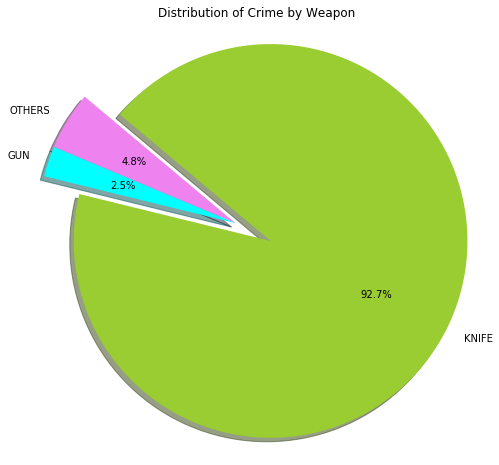

In [13]:
labels = renamed_df.Method.unique()
sizes = renamed_df.groupby(['Method'])["CCN"].count()
colors = ["violet", "aqua", "yellowgreen"]
explode = (0, 0, 0.2)

plt.figure(figsize=(8, 8))
plt.title("Distribution of Crime by Weapon")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Histograms

### Create Function to Plot Histogram

In [14]:
def plotHistogram(col, df):
    #Groupby operation on Target Column
    #Assign to temporarily DataFrame
    sub_df = df.groupby([col]).count()['CCN']
    sub_df = pd.DataFrame(sub_df)
    sub_df.sort_values('CCN', ascending=False, inplace=True)

    #Plot Histogram
    chart = sub_df.plot(kind="hist", color="yellowgreen", grid="True", figsize=(8,8), 
                        bins=100, title=f"Histogram of {col}")
    chart.set_ylabel("Frequency of Offenses")
    plt.show()

### Create Histograms for Each Column

In [15]:
cols = ['Report', 'Shift', 'Method', 'Offense', 'Block', 'XBlock',
       'YBlock', 'Ward', 'ANC', 'District', 'PSA', 'Neighborhood',
       'Block_Grou', 'Census_Trac', 'Voting_Precinct', 'Latitude', 'Longitude',
       'Bid', 'Start_Date', 'End_Date', 'Object_ID', 'Octo_Recor']

- Graphs indicate that none of these variable demonstrate a normal distribution 

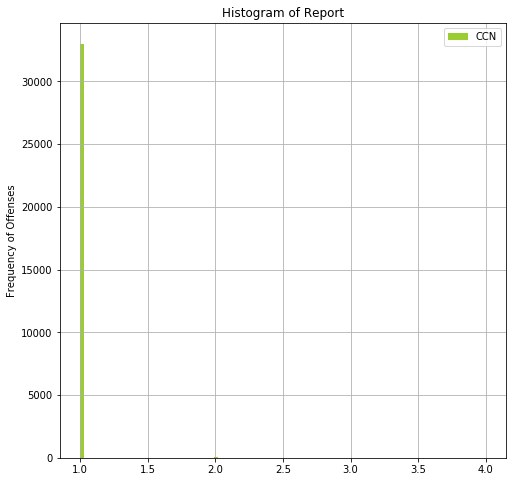

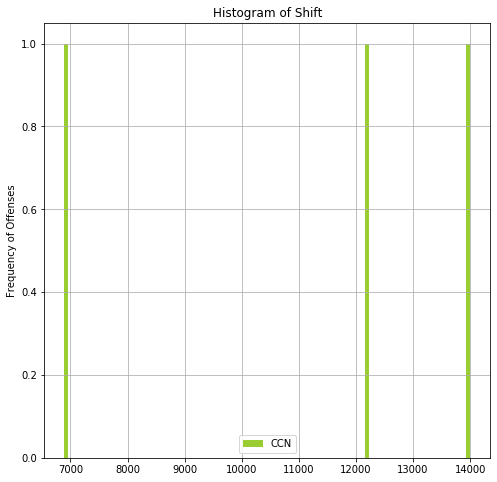

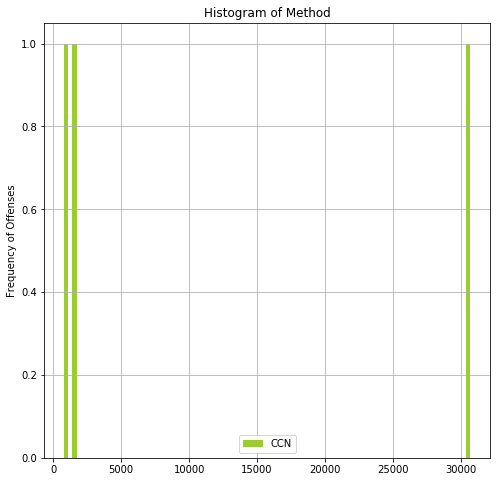

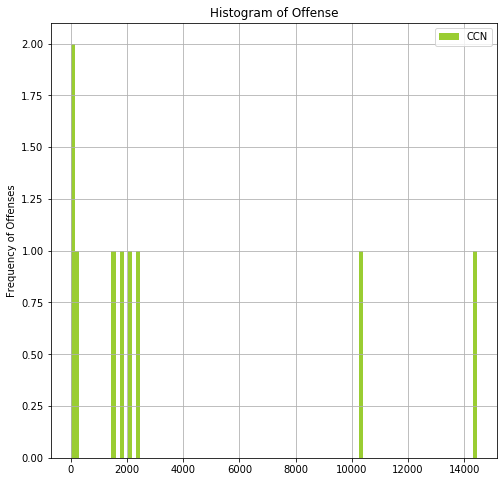

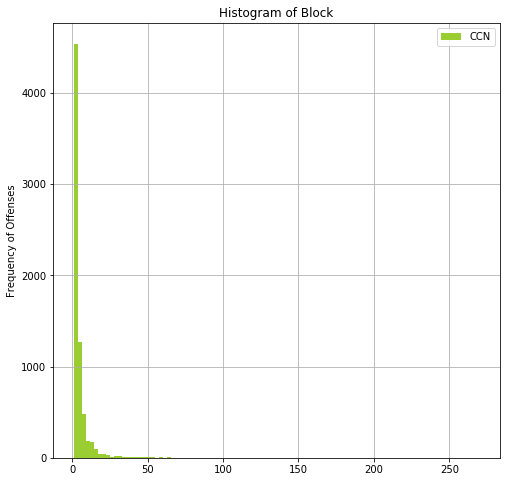

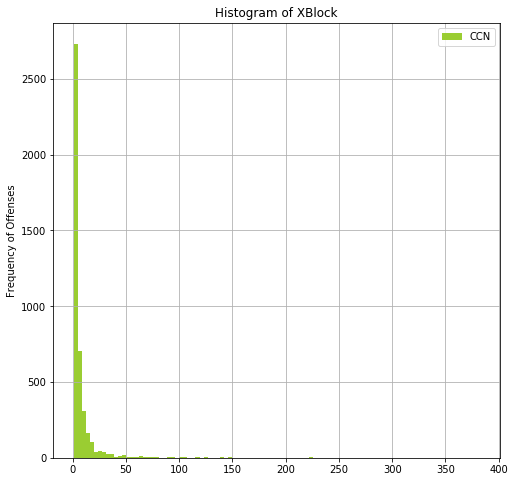

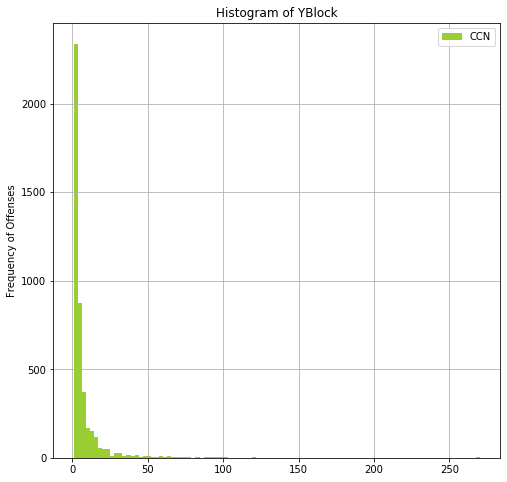

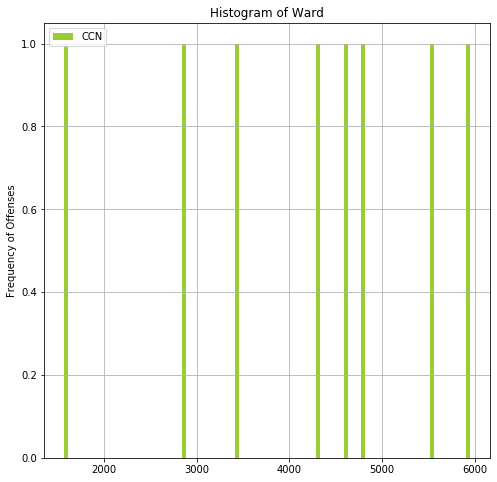

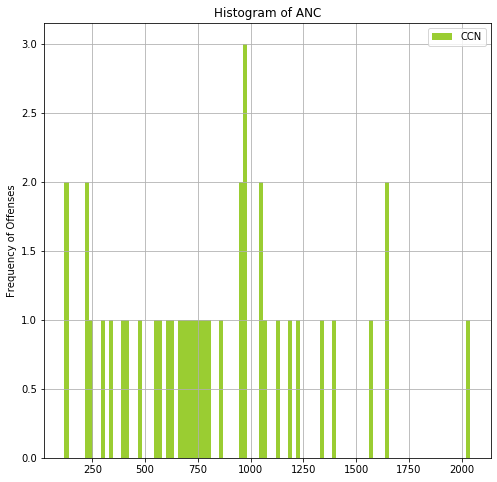

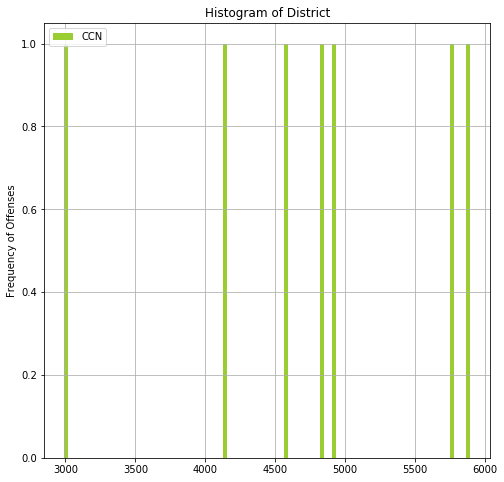

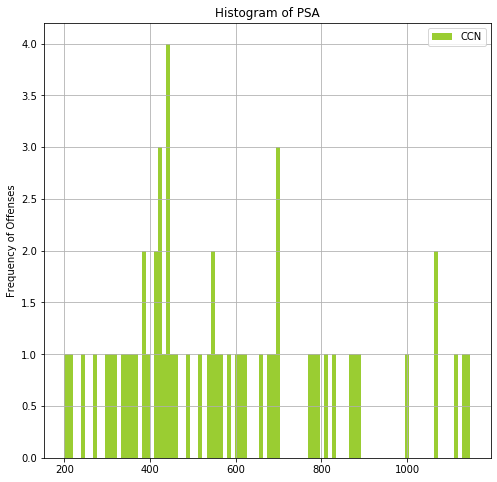

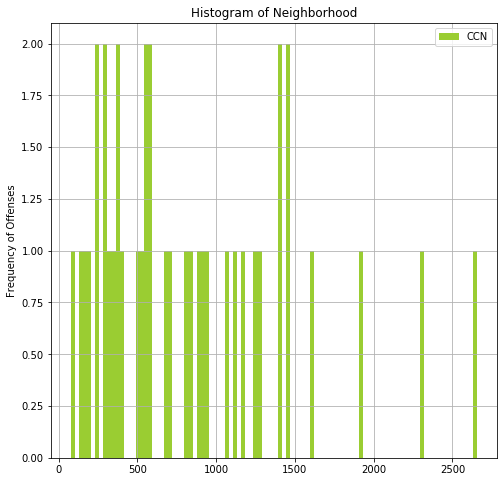

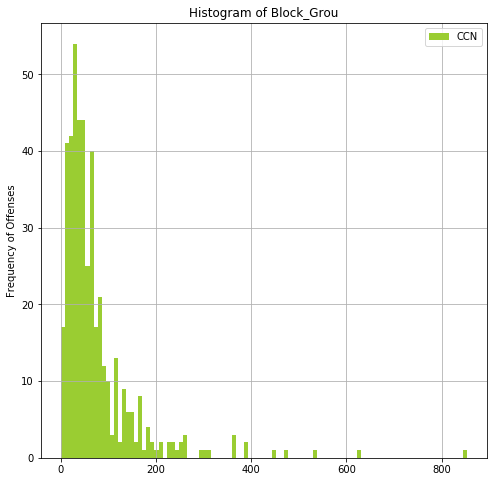

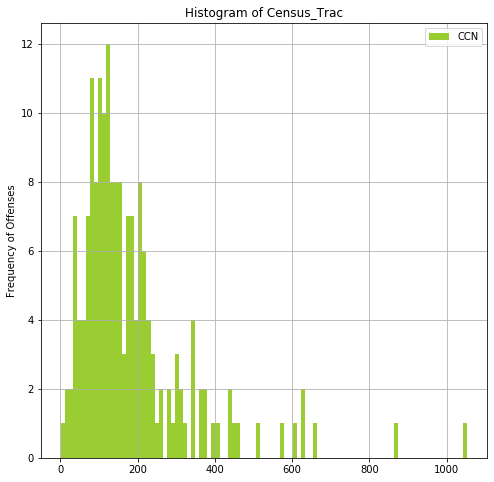

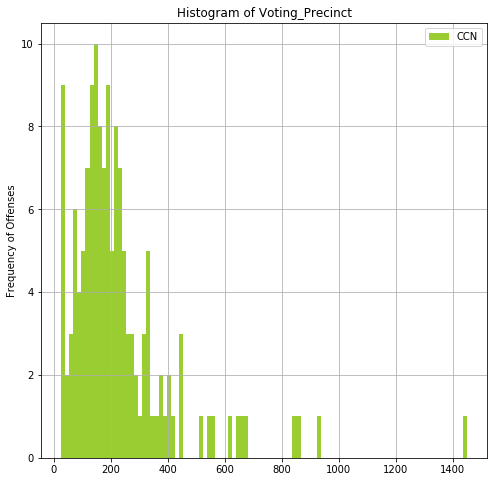

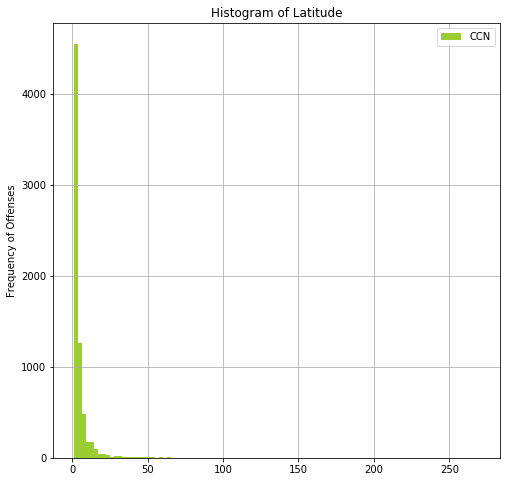

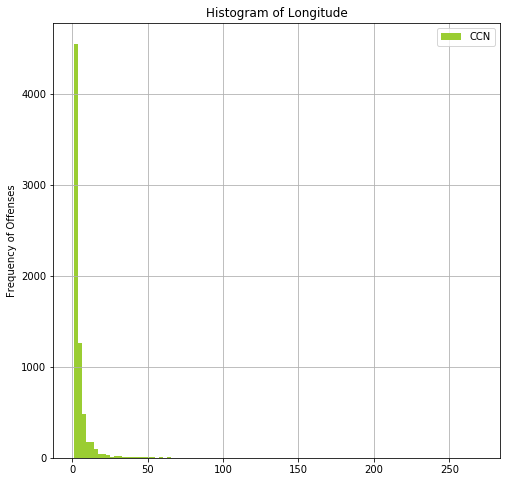

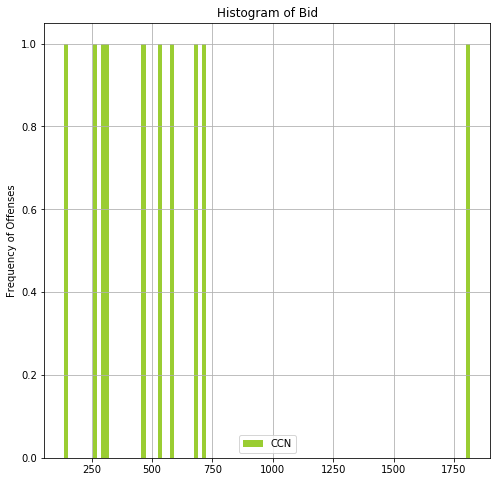

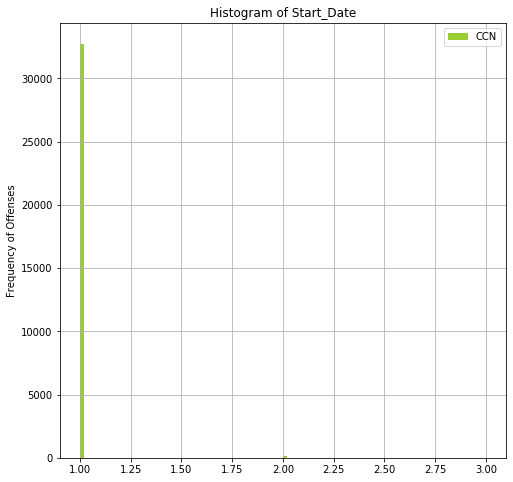

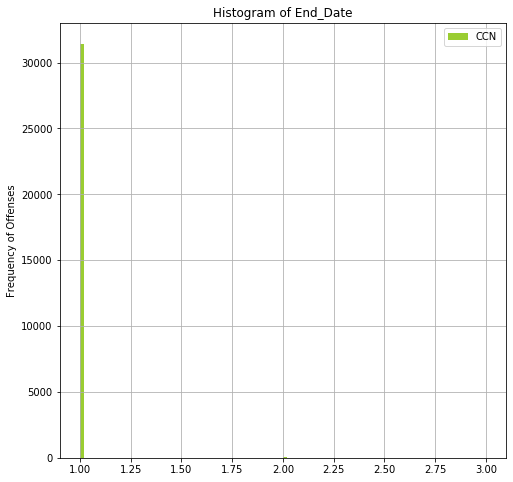

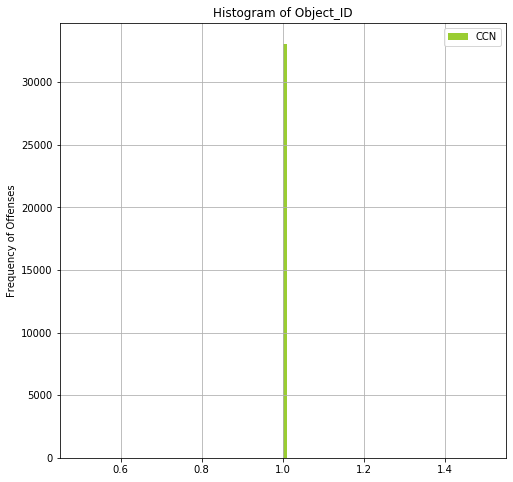

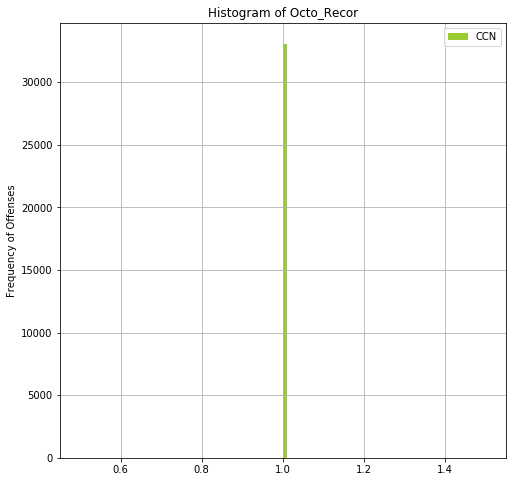

In [16]:
for col in cols:
    plotHistogram(col,renamed_df)

# Bar Charts

### Create Function to Plot Bar Chart

In [17]:
def plotBarChart(col, df):
    #Groupby operation on Target Column
    #Assign to temporarily DataFrame
    sub_df = df.groupby([col]).count()['CCN']
    sub_df = pd.DataFrame(sub_df)
    sub_df.sort_values('CCN', ascending=False, inplace=True)
    sub_df = sub_df.head(10)

    #Plot Bar Chart
    chart = sub_df.plot(kind="bar", color="yellowgreen", grid="True", figsize=(8,8), title=f"Bar Chart of {col}")
    chart.set_ylabel("Number of Offenses")
    plt.show()

### Crime by Type of Offense

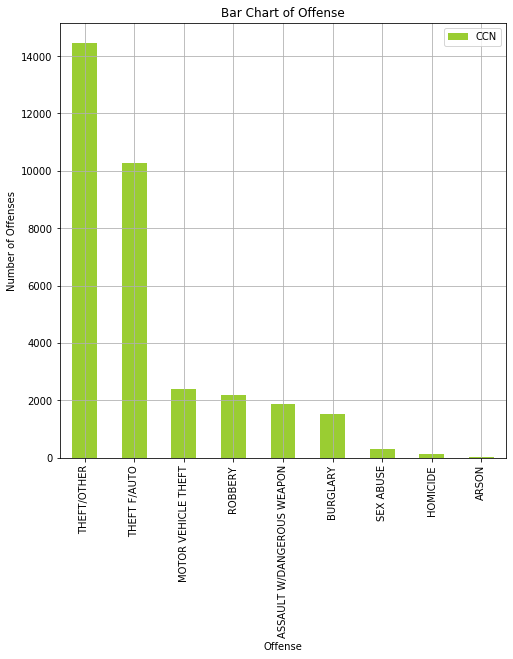

In [18]:
plotBarChart('Offense', renamed_df)

### Crime by Census Tract

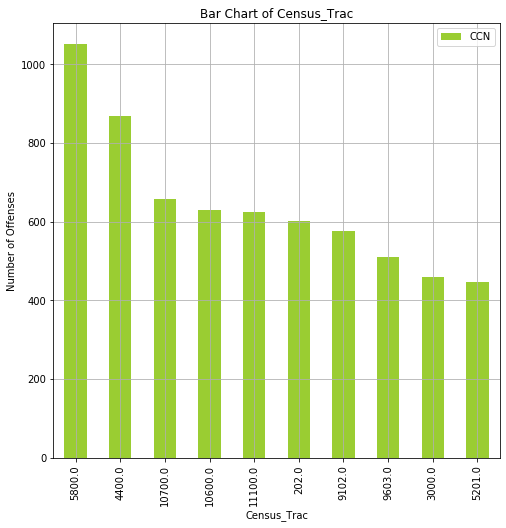

In [19]:
plotBarChart('Census_Trac', renamed_df)

# Crime by Weapon

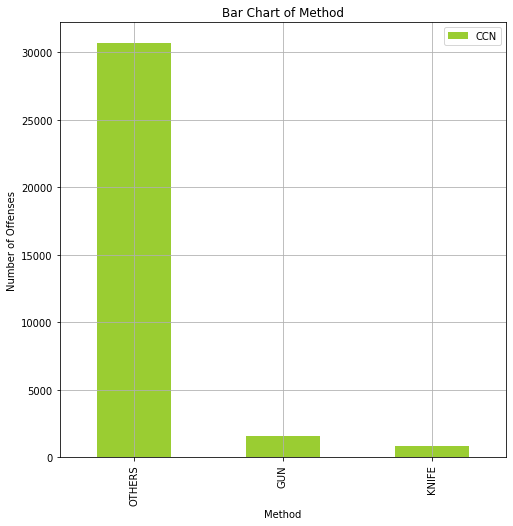

In [20]:
plotBarChart('Method', renamed_df)

# Correlation

Many of the fields in this dataset were related to location (e.g. XBlock, Ward,Census Tract, Voting Precinct, Latitude, Longitude).
Consequently, it was difficult to find meaningful correlations.

In [21]:
renamed_df.corr()

,CCN,XBlock,YBlock,Ward,District,PSA,Census_Trac,Latitude,Longitude,Object_ID
CCN,1.000000,-0.023778,0.013871,-0.027237,-0.023326,-0.023277,-0.015033,0.013869,-0.023775,-0.137417
XBlock,-0.023778,1.000000,-0.431536,0.731881,0.627243,0.627632,0.662248,-0.431537,1.000000,0.077595
YBlock,0.013871,-0.431536,1.000000,-0.604422,-0.339318,-0.342631,-0.521944,1.000000,-0.431603,-0.037003
Ward,-0.027237,0.731881,-0.604422,1.000000,0.576764,0.576670,0.582619,-0.604424,0.731845,0.062215
District,-0.023326,0.627243,-0.339318,0.576764,1.000000,0.999924,0.398355,-0.339336,0.627175,0.075858
PSA,-0.023277,0.627632,-0.342631,0.576670,0.999924,1.000000,0.399889,-0.342648,0.627565,0.075729
Census_Trac,-0.015033,0.662248,-0.521944,0.582619,0.398355,0.399889,1.000000,-0.521892,0.662361,0.051251
Latitude,0.013869,-0.431537,1.000000,-0.604424,-0.339336,-0.342648,-0.521892,1.000000,-0.431604,-0.037001
Longitude,-0.023775,1.000000,-0.431603,0.731845,0.627175,0.627565,0.662361,-0.431604,1.000000,0.077593
Object_ID,-0.137417,0.077595,-0.037003,0.062215,0.075858,0.075729,0.051251,-0.037001,0.077593,1.000000


### Heatmap to Illustrate Correlation

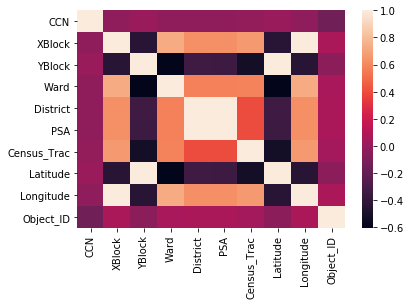

In [22]:
sn.heatmap(renamed_df.corr())
plt.show()

# Scatter Plots

As discussed above, scatter plots do not illustrate any meaning correlations

### Function to Create Scatter Plot

In [23]:
def makeScatter(col1, col2, df):  
    plt.figure(figsize=(8, 8))
    plt.scatter(df[col1], df[col2], c="blueviolet", edgecolors="black", alpha=0.35)
    plt.title(f"{col1.title()} vs {col2.title()}")
    plt.xlabel(f"{col1.title()}")
    plt.ylabel(f"{col2.title()}")
    plt.tight_layout
    plt.show()

### Create List of Variables for Scatter Plots

In [24]:
cols = ['CCN', 'XBlock', 'YBlock', 'Ward', 'District', 'PSA', 'Census_Trac',
       'Latitude', 'Longitude', 'Object_ID']

### Create Scatter Plots for Census Trac

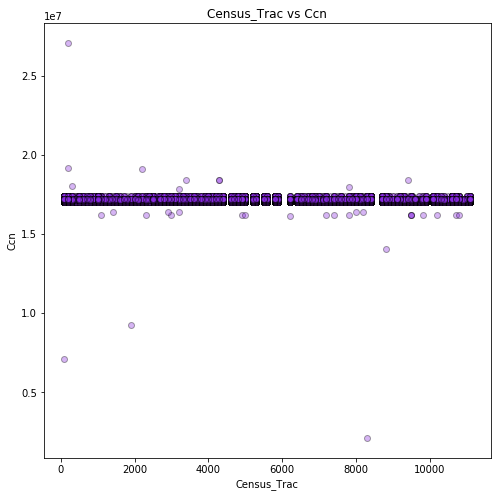

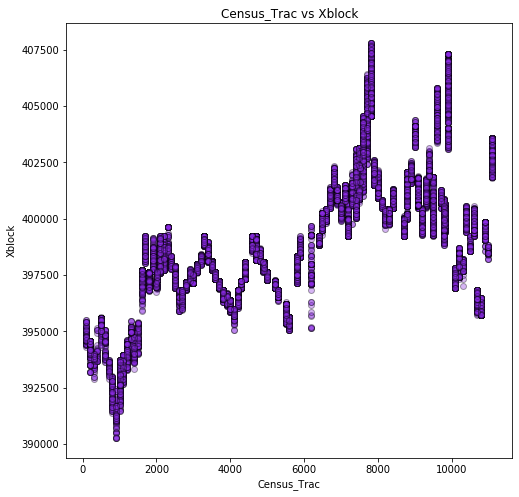

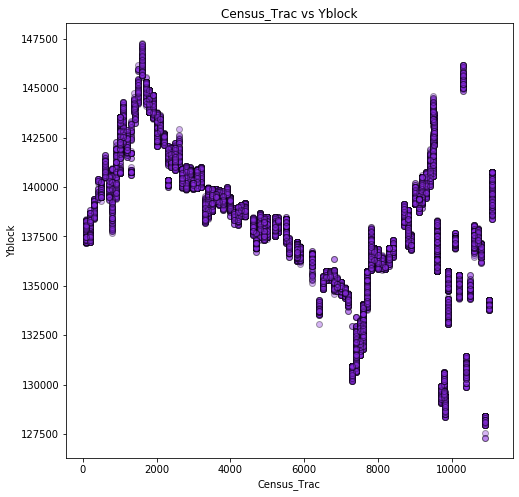

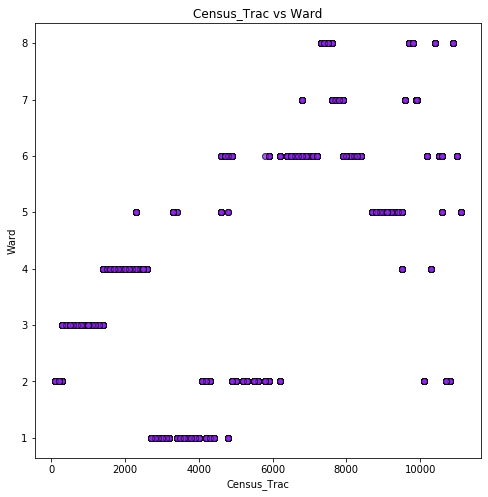

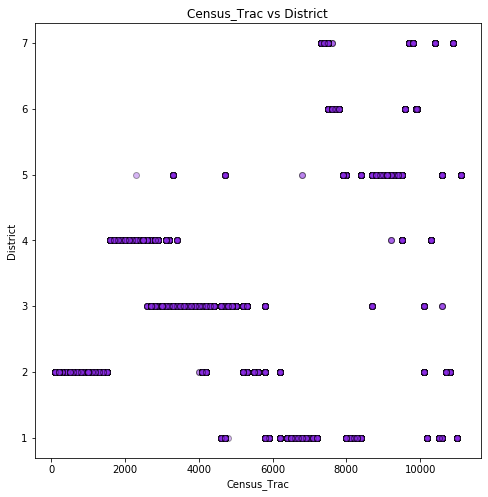

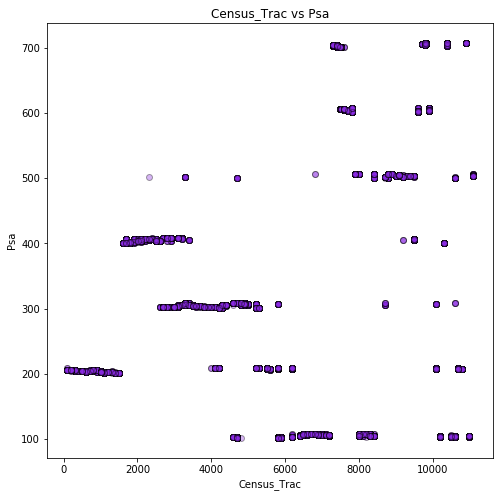

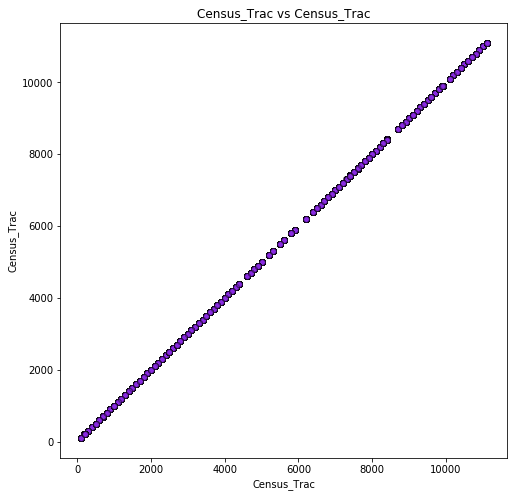

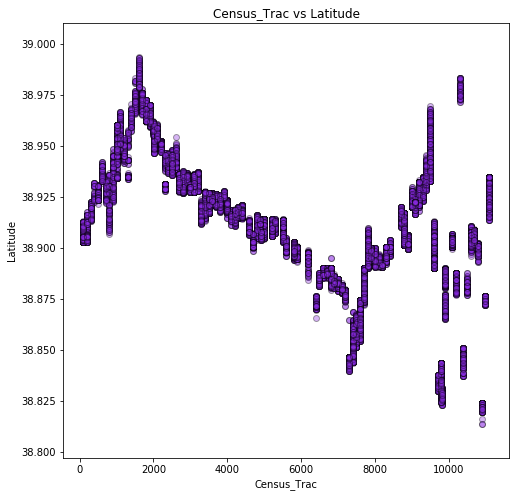

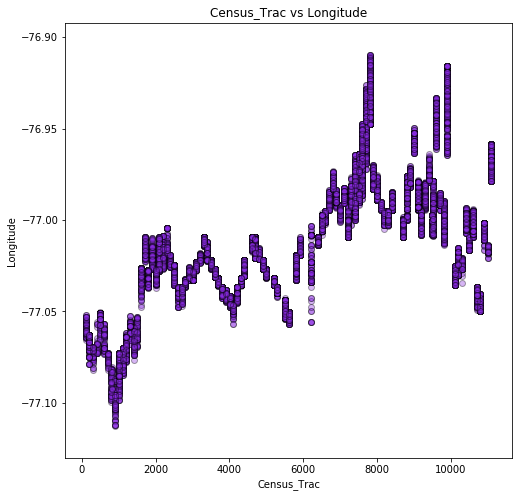

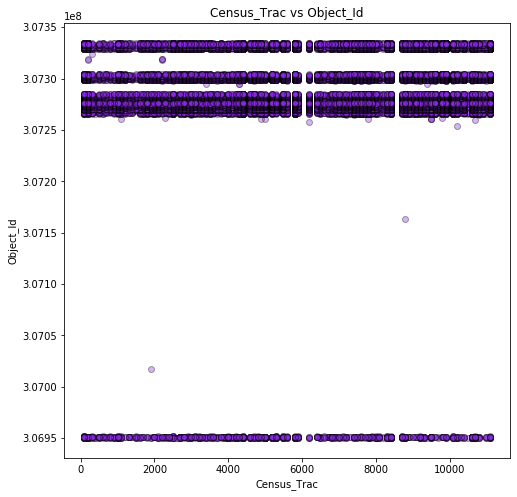

In [25]:
for col in cols:
    makeScatter("Census_Trac", col, renamed_df)

# Chisquared Analysis

In [26]:
rr_df = renamed_df.groupby(renamed_df.Census_Trac).count()['CCN']
rr_df

sub_df = pd.DataFrame(rr_df)
sub_df.sort_values('CCN', ascending=False, inplace=True)
sub_df = sub_df.head(10)
sub_df

,CCN
Census_Trac,
5800.0,1053
4400.0,870
10700.0,659
10600.0,629
11100.0,626
202.0,603
9102.0,577
9603.0,510
3000.0,459


In [27]:
(sub_df['CCN'].sum())/10

643.2

In [28]:
sub_df["Expected"]=643.2

In [29]:
chisquare(sub_df['CCN'],sub_df['Expected'])

Power_divergenceResult(statistic=492.35012437810934, pvalue=2.4970783146911526e-100)

In [30]:
new_list =[1000, 850, 650, 630, 630, 600, 550, 500, 450, 450]
sub_df['Expected']= new_list
sub_df

,CCN,Expected
Census_Trac,,
5800.0,1053,1000
4400.0,870,850
10700.0,659,650
10600.0,629,630
11100.0,626,630
202.0,603,600
9102.0,577,550
9603.0,510,500
3000.0,459,450


In [31]:
chisquare(sub_df['CCN'],sub_df['Expected'])

Power_divergenceResult(statistic=5.187197847903731, pvalue=0.8176938877718074)